# SeismicArray Demo

This notebook demonstrates how to use the SeismicArray class for array-derived rotation (ADR) computation.


## 1. Load Libraries


In [ ]:
import yaml

from obspy import UTCDateTime
from sixdegrees.seismicarray import seismicarray

from sixdegrees.plots.plot_frequency_limits_vs_velocity import plot_frequency_limits_vs_velocity


## 2. Initialize SeismicArray

Now we can create a SeismicArray instance using our configuration.


In [ ]:
# setup array instance
array = seismicarray('./config/config_array_romy.yml')
# array = seismicarray('./config/config_array_pfo.yml')

# Show array configuration
array.show_array_info()


├── stations: ['GR.FUR', 'BW.FFB1', 'BW.FFB2', 'BW.FFB3', 'BW.TON', 'BW.BIB', 'BW.GRMB', 'BW.GELB', 'BW.ALFT']
├── reference_station: GR.FUR
├── channel_prefix: B
├── channel_prefixes: ['B']
├── channel_prefix_mapping
        │   ├── GR.FUR: B
        │   ├── BW.FFB1: B
        │   ├── BW.FFB2: B
        │   ├── BW.FFB3: B
        │   ├── BW.TON: B
        │   ├── BW.BIB: B
        │   ├── BW.GRMB: B
        │   ├── BW.GELB: B
        │   └── BW.ALFT: B
├── response_output: VEL
├── fdsn_clients: ['BGR', 'LMU']
├── client_mapping
        │   ├── GR.FUR: BGR
        │   ├── BW.FFB1: BGR
        │   ├── BW.FFB2: BGR
        │   ├── BW.FFB3: BGR
        │   ├── BW.TON: BGR
        │   ├── BW.BIB: BGR
        │   ├── BW.GRMB: BGR
        │   ├── BW.GELB: BGR
        │   └── BW.ALFT: BGR
├── adr_parameters
        │   ├── vp: 6200.0
        │   ├── vs: 3700.0
        │   └── sigmau: 1e-09
├── station_coordinates
├── station_distances
└── failed_stations: []


## 3. Get Station Inventories

Fetch station metadata and compute inter-station distances.


In [12]:
# Define time window
tbeg = UTCDateTime("2025-07-29 23:30:00")
tend = UTCDateTime("2025-07-30 00:30:00")

# Get inventories
array.request_inventories(tbeg, tend)

# Compute distances
array.compute_station_distances()


In [13]:
array.show_array_info()

├── stations: ['GR.FUR', 'BW.FFB1', 'BW.FFB2', 'BW.FFB3', 'BW.TON', 'BW.BIB', 'BW.GRMB', 'BW.GELB', 'BW.ALFT']
├── reference_station: GR.FUR
├── channel_prefix: B
├── channel_prefixes: ['B']
├── channel_prefix_mapping
        │   ├── GR.FUR: B
        │   ├── BW.FFB1: B
        │   ├── BW.FFB2: B
        │   ├── BW.FFB3: B
        │   ├── BW.TON: B
        │   ├── BW.BIB: B
        │   ├── BW.GRMB: B
        │   ├── BW.GELB: B
        │   └── BW.ALFT: B
├── response_output: VEL
├── fdsn_clients: ['BGR', 'LMU']
├── client_mapping
        │   ├── GR.FUR: BGR
        │   ├── BW.FFB1: LMU
        │   ├── BW.FFB2: LMU
        │   ├── BW.FFB3: LMU
        │   ├── BW.TON: LMU
        │   ├── BW.BIB: LMU
        │   ├── BW.GRMB: LMU
        │   ├── BW.GELB: LMU
        │   └── BW.ALFT: LMU
├── adr_parameters
        │   ├── vp: 6200.0
        │   ├── vs: 3700.0
        │   └── sigmau: 1e-09
├── station_coordinates
        │   ├── GR.FUR
                │   │   ├── latitude: 48.1639
           

## 4. Check Array Geometry


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


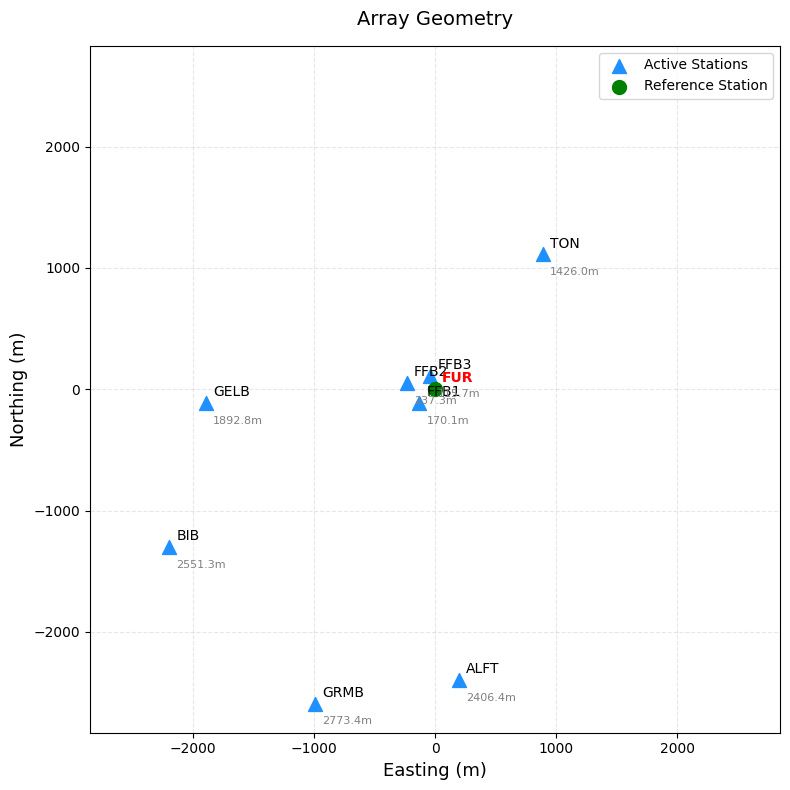

In [14]:
array.plot_array_geometry(
    show_dropped=True,
    # save_path='./figures/array_geometry.png'
    )

## 5. Check Array Distance by Azimuth


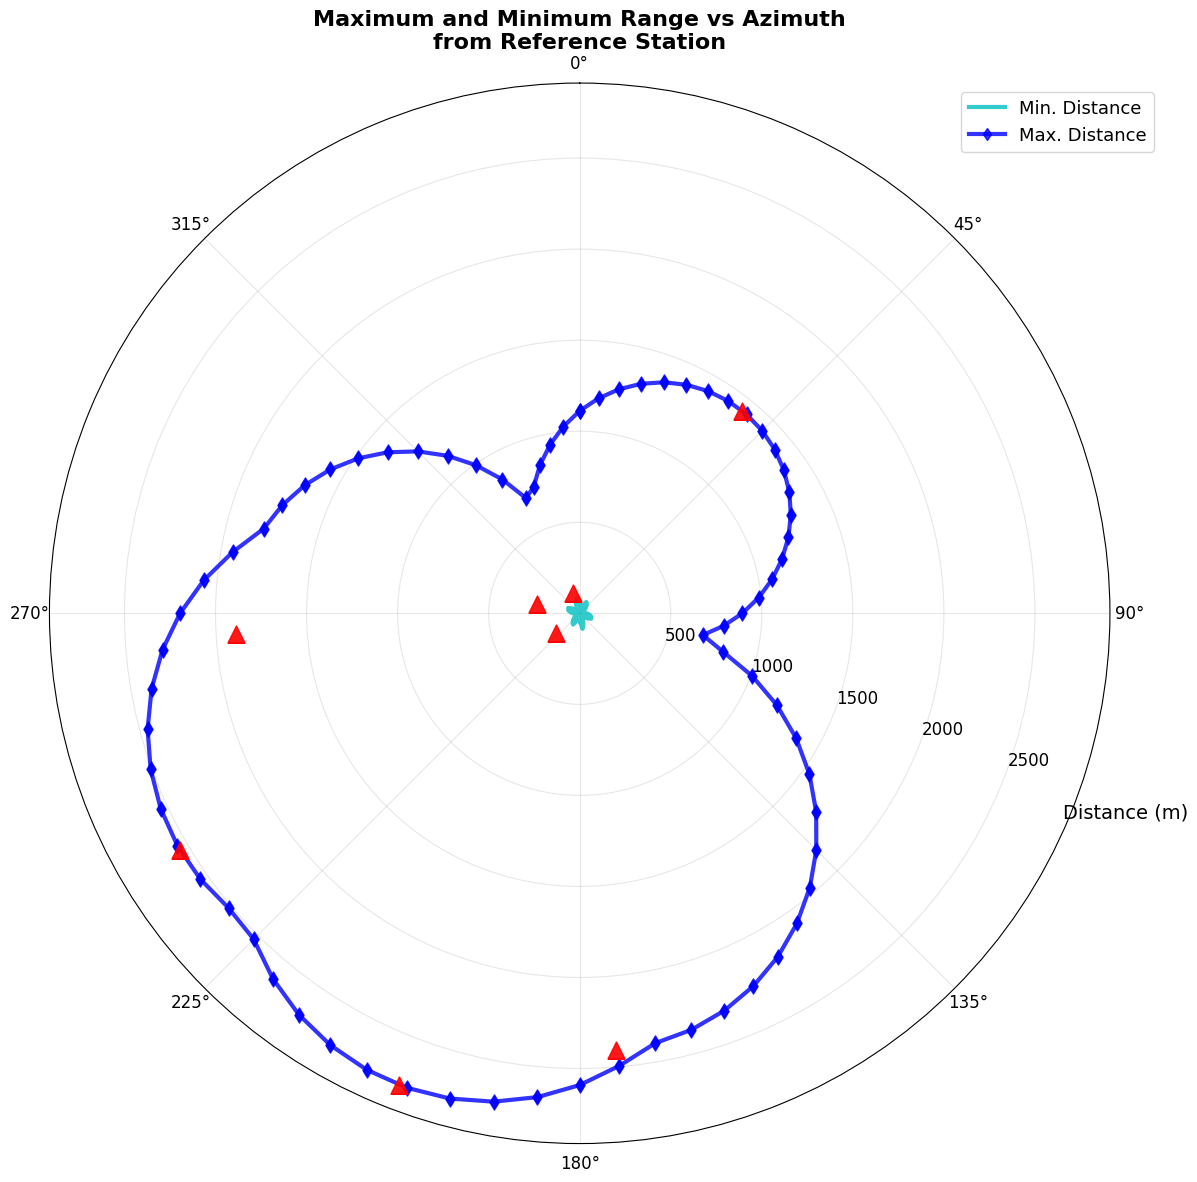

In [ ]:
# Compute azimuth distance range
results = array.compute_azimuth_distance_range(
    azimuth_step=5.0,  # 5-degree steps
    show_station_labels=False,
)


## 6. Plot Frequency Range versus Azimuth

In [50]:
# Convert to frequencies
freq_results = array.convert_distances_to_frequencies(
    apparent_velocity=3000.0,
    optional_amplitude_uncertainty=0.03
)

# Access different bounds
print(f"Optimistic fmin - fmax:   {freq_results['fmin_optimistic']:.3f} - {freq_results['fmax_optimistic']:.3f} Hz")
print(f"Conservative fmin - fmax: {freq_results['fmin_conservative']:.3f} - {freq_results['fmax_conservative']:.3f} Hz")

Optimistic fmin - fmax:   0.032 - 1.092 Hz
Conservative fmin - fmax: 0.131 - 0.270 Hz


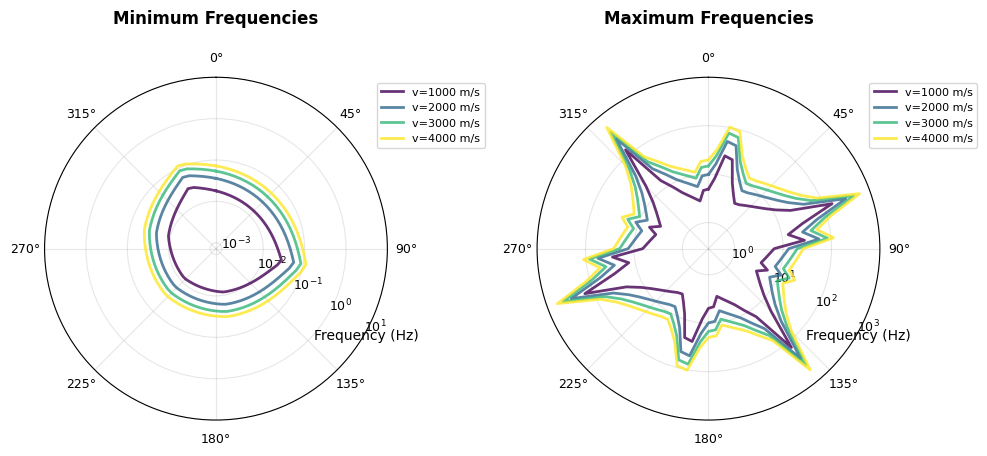

In [51]:
array.plot_frequency_limits(velocity_range=[1000, 2000, 3000, 4000],)

## 7. Plot Frequency Limits versus the Apparent Veloctiy

Computing frequency limits for 100 velocities...
Velocity range: 500 to 5000 m/s
Amplitude uncertainty: 0.03

Frequency ranges:
fmin_optimistic: 0.005 to 0.054 Hz
fmax_optimistic: 0.182 to 1.820 Hz
fmin_conservative: 0.022 to 0.218 Hz
fmax_conservative: 0.045 to 0.451 Hz


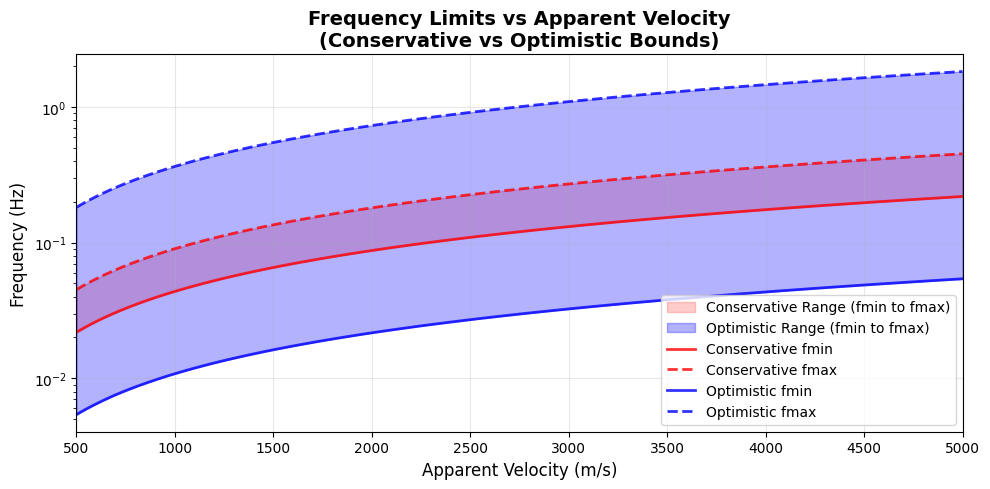

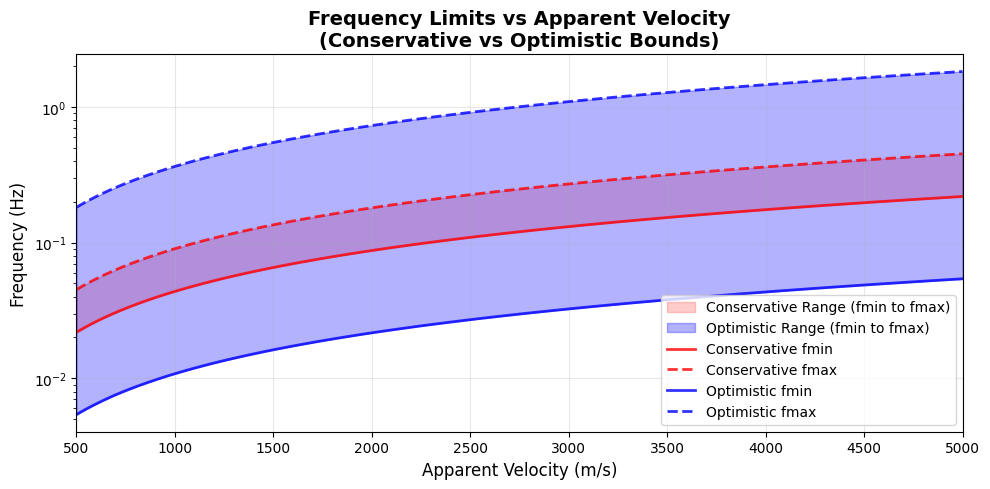

In [ ]:
plot_frequency_limits_vs_velocity(
    array=array,
    velocity_min=500,
    velocity_max=5000,
    velocity_step=100,
    amplitude_uncertainty=0.03
)